In [1]:
import numpy as np
import lda

In [62]:
X = lda.datasets.load_reuters()
vocab = lda.datasets.load_reuters_vocab()
titles = lda.datasets.load_reuters_titles()

In [64]:
print(len(vocab))

4258


In [3]:
X.shape

(395, 4258)

In [4]:
X.sum()

84010

In [5]:
vocab[:5]

('church', 'pope', 'years', 'people', 'mother')

In [6]:
titles[:5]

('0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20',
 '1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany 1996-08-21',
 "2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23",
 '3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25',
 '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25')

In [60]:
model = lda.LDA(n_topics=20, n_iter=1500, random_state=1000)
model.fit(X)
topic_word = model.topic_word_
n_top_words = 8

INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -1051748
INFO:lda:<10> log likelihood: -721992
INFO:lda:<20> log likelihood: -701281
INFO:lda:<30> log likelihood: -692899
INFO:lda:<40> log likelihood: -687495
INFO:lda:<50> log likelihood: -683933
INFO:lda:<60> log likelihood: -680950
INFO:lda:<70> log likelihood: -678253
INFO:lda:<80> log likelihood: -676331
INFO:lda:<90> log likelihood: -675203
INFO:lda:<100> log likelihood: -673154
INFO:lda:<110> log likelihood: -671880
INFO:lda:<120> log likelihood: -670642
INFO:lda:<130> log likelihood: -669378
INFO:lda:<140> log likelihood: -669324
INFO:lda:<150> log likelihood: -669086
INFO:lda:<160> log likelihood: -667835
INFO:lda:<170> log likelihood: -667801
INFO:lda:<180> log likelihood: -667118
INFO:lda:<190> log likelihood: -666363
INFO:lda:<200> log likelihood: -665758
INFO:lda:<210> log likelihood: -665797
INFO:lda:<220> log likelihood: -

In [73]:
print(topic_word.shape)

(20, 4258)


In [55]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: against france french bardot west women film
Topic 1: british churchill kennedy former sale london war
Topic 2: germany german michael romania nazi letter king
Topic 3: pope wright catholic bishop day church women
Topic 4: east peace prize timor belo award indonesia
Topic 5: minister party president government political group christian
Topic 6: told life people years n't made former
Topic 7: mother teresa order heart nuns charity calcutta
Topic 8: city art miami versace cunanan police cultural
Topic 9: charles prince royal diana king queen bowles
Topic 10: church first people war during visit union
Topic 11: elvis music fans concert king tour first
Topic 12: yeltsin russian russia kremlin moscow operation president
Topic 13: harriman u.s clinton paris ambassador churchill france
Topic 14: year church world three last million says
Topic 15: family church funeral died home service clinton
Topic 16: pope vatican surgery rome hospital roman pontiff
Topic 17: bernardin cardinal chu

In [56]:
doc_topic = model.doc_topic_
for i in range(10):
    print("{} (top topic: {})".format(titles[i], doc_topic[i].argmax()))

0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20 (top topic: 9)
1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany 1996-08-21 (top topic: 10)
2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23 (top topic: 7)
3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25 (top topic: 9)
4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25 (top topic: 7)
5 INDIA: Mother Teresa's condition unchanged, thousands pray. CALCUTTA 1996-08-25 (top topic: 7)
6 INDIA: Mother Teresa shows signs of strength, blesses nuns. CALCUTTA 1996-08-26 (top topic: 7)
7 INDIA: Mother Teresa's condition improves, many pray. CALCUTTA, India 1996-08-25 (top topic: 7)
8 INDIA: Mother Teresa improves, nuns pray for "miracle". CALCUTTA 1996-08-26 (top topic: 7)
9 UK: Charles under fire over prospect of Queen Camilla. LONDON 1996-08-26 (top topic: 9)


In [57]:
X = lda.datasets.load_reuters()
titles = lda.datasets.load_reuters_titles()
X_train = X[10:]
X_test = X[:10]
titles_test = titles[:10]
model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)
model.fit(X_train)
doc_topic_test = model.transform(X_test)
for title, topics in zip(titles_test, doc_topic_test):
    print("{} (top topic: {})".format(title, topics.argmax()))

INFO:lda:n_documents: 385
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 81638
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -1023787
INFO:lda:<10> log likelihood: -702835
INFO:lda:<20> log likelihood: -681170
INFO:lda:<30> log likelihood: -672707
INFO:lda:<40> log likelihood: -668115
INFO:lda:<50> log likelihood: -664758
INFO:lda:<60> log likelihood: -662373
INFO:lda:<70> log likelihood: -660891
INFO:lda:<80> log likelihood: -658295
INFO:lda:<90> log likelihood: -656514
INFO:lda:<100> log likelihood: -655963
INFO:lda:<110> log likelihood: -654069
INFO:lda:<120> log likelihood: -652964
INFO:lda:<130> log likelihood: -652273
INFO:lda:<140> log likelihood: -651804
INFO:lda:<150> log likelihood: -650778
INFO:lda:<160> log likelihood: -649958
INFO:lda:<170> log likelihood: -649838
INFO:lda:<180> log likelihood: -648451
INFO:lda:<190> log likelihood: -648501
INFO:lda:<200> log likelihood: -647599
INFO:lda:<210> log likelihood: -647649
INFO:lda:<220> log likelihood: -

0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20 (top topic: 7)
1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany 1996-08-21 (top topic: 11)
2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23 (top topic: 4)
3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25 (top topic: 7)
4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25 (top topic: 4)
5 INDIA: Mother Teresa's condition unchanged, thousands pray. CALCUTTA 1996-08-25 (top topic: 4)
6 INDIA: Mother Teresa shows signs of strength, blesses nuns. CALCUTTA 1996-08-26 (top topic: 4)
7 INDIA: Mother Teresa's condition improves, many pray. CALCUTTA, India 1996-08-25 (top topic: 4)
8 INDIA: Mother Teresa improves, nuns pray for "miracle". CALCUTTA 1996-08-26 (top topic: 4)
9 UK: Charles under fire over prospect of Queen Camilla. LONDON 1996-08-26 (top topic: 11)


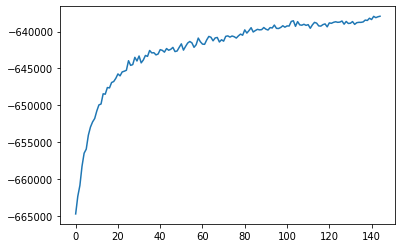

In [59]:
import matplotlib.pyplot as plt
# skipping the first few entries makes the graph more readable
plt.plot(model.loglikelihoods_[5:])